In [1]:
import numpy as np
import pandas as pd
from matplotlib.backends.backend_pdf import PdfPages

import matplotlib.pyplot as plt

In [2]:
exp_df = pd.read_csv('../outExp.csv')


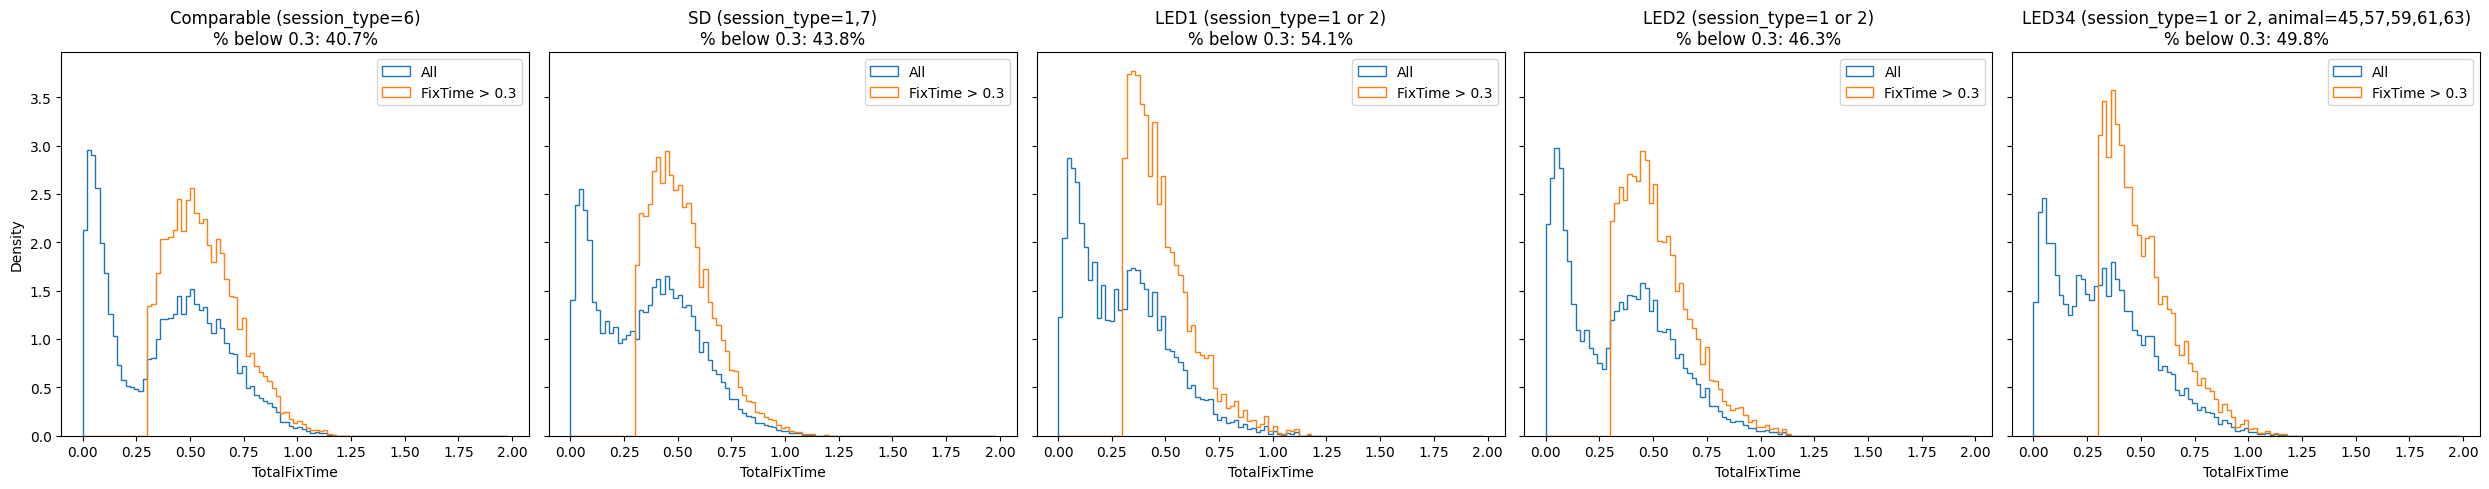

In [3]:
cases = [
    {
        "label": 'Comparable (session_type=6)',
        "query": (exp_df['batch_name'] == 'Comparable') & 
                 (exp_df['LED_trial'].isin([np.nan, 0])) & 
                 (exp_df['session_type'] == 6)
    },
    {
        "label": 'SD (session_type=1,7)',
        "query": (exp_df['batch_name'] == 'SD') & 
                 (exp_df['LED_trial'].isin([np.nan, 0])) & 
                 (exp_df['session_type'].isin([1, 7]))
    },
    {
        "label": 'LED1 (session_type=1 or 2)',
        "query": (exp_df['batch_name'] == 'LED1') & 
                 (exp_df['LED_trial'].isin([np.nan, 0])) & 
                 (exp_df['session_type'].isin([1, 2]))
    },
    {
        "label": 'LED2 (session_type=1 or 2)',
        "query": (exp_df['batch_name'] == 'LED2') & 
                 (exp_df['LED_trial'].isin([np.nan, 0])) & 
                 (exp_df['session_type'].isin([1, 2]))
    },
    {
        "label": 'LED34 (session_type=1 or 2, animal=45,57,59,61,63)',
        "query": (exp_df['batch_name'] == 'LED34') & 
                 (exp_df['LED_trial'].isin([np.nan, 0])) & 
                 (exp_df['session_type'].isin([1, 2])) & 
                 (exp_df['animal'].isin([45, 57, 59, 61, 63]))
    }
    # {
    #     "label": 'LED7 (session_type=7, animal=45,57,59,61,63)',
    #     "query": (exp_df['batch_name'] == 'LED7') & 
    #              (exp_df['LED_trial'].isin([np.nan, 0])) & 
    #              (exp_df['session_type'] == 7) & 
    #              (exp_df['animal'].isin([90,92,93,98,99,100,102,103]))
    # }
]

fig, axes = plt.subplots(1, len(cases), figsize=(5*len(cases), 5), sharey=True)
if len(cases) == 1:
    axes = [axes]

bins = np.arange(0,2,0.02)
for ax, case in zip(axes, cases):
    exp_df_batch = exp_df[case["query"]]
    df_aborts = exp_df_batch[exp_df_batch['abort_event'] == 3]
    n_total = len(df_aborts)
    n_below = (df_aborts['TotalFixTime'] < 0.3).sum()
    pct_below = (n_below / n_total * 100) if n_total > 0 else 0

    ax.hist(df_aborts['TotalFixTime'], density=True, bins=bins, histtype='step', label='All')
    ax.hist(df_aborts[df_aborts['TotalFixTime'] > 0.3]['TotalFixTime'], density=True, bins=bins, histtype='step', label='FixTime > 0.3')
    ax.set_title(f"{case['label']}\n% below 0.3: {pct_below:.1f}%")
    ax.set_xlabel('TotalFixTime')
    ax.legend()
axes[0].set_ylabel('Density')
plt.tight_layout()
plt.show()

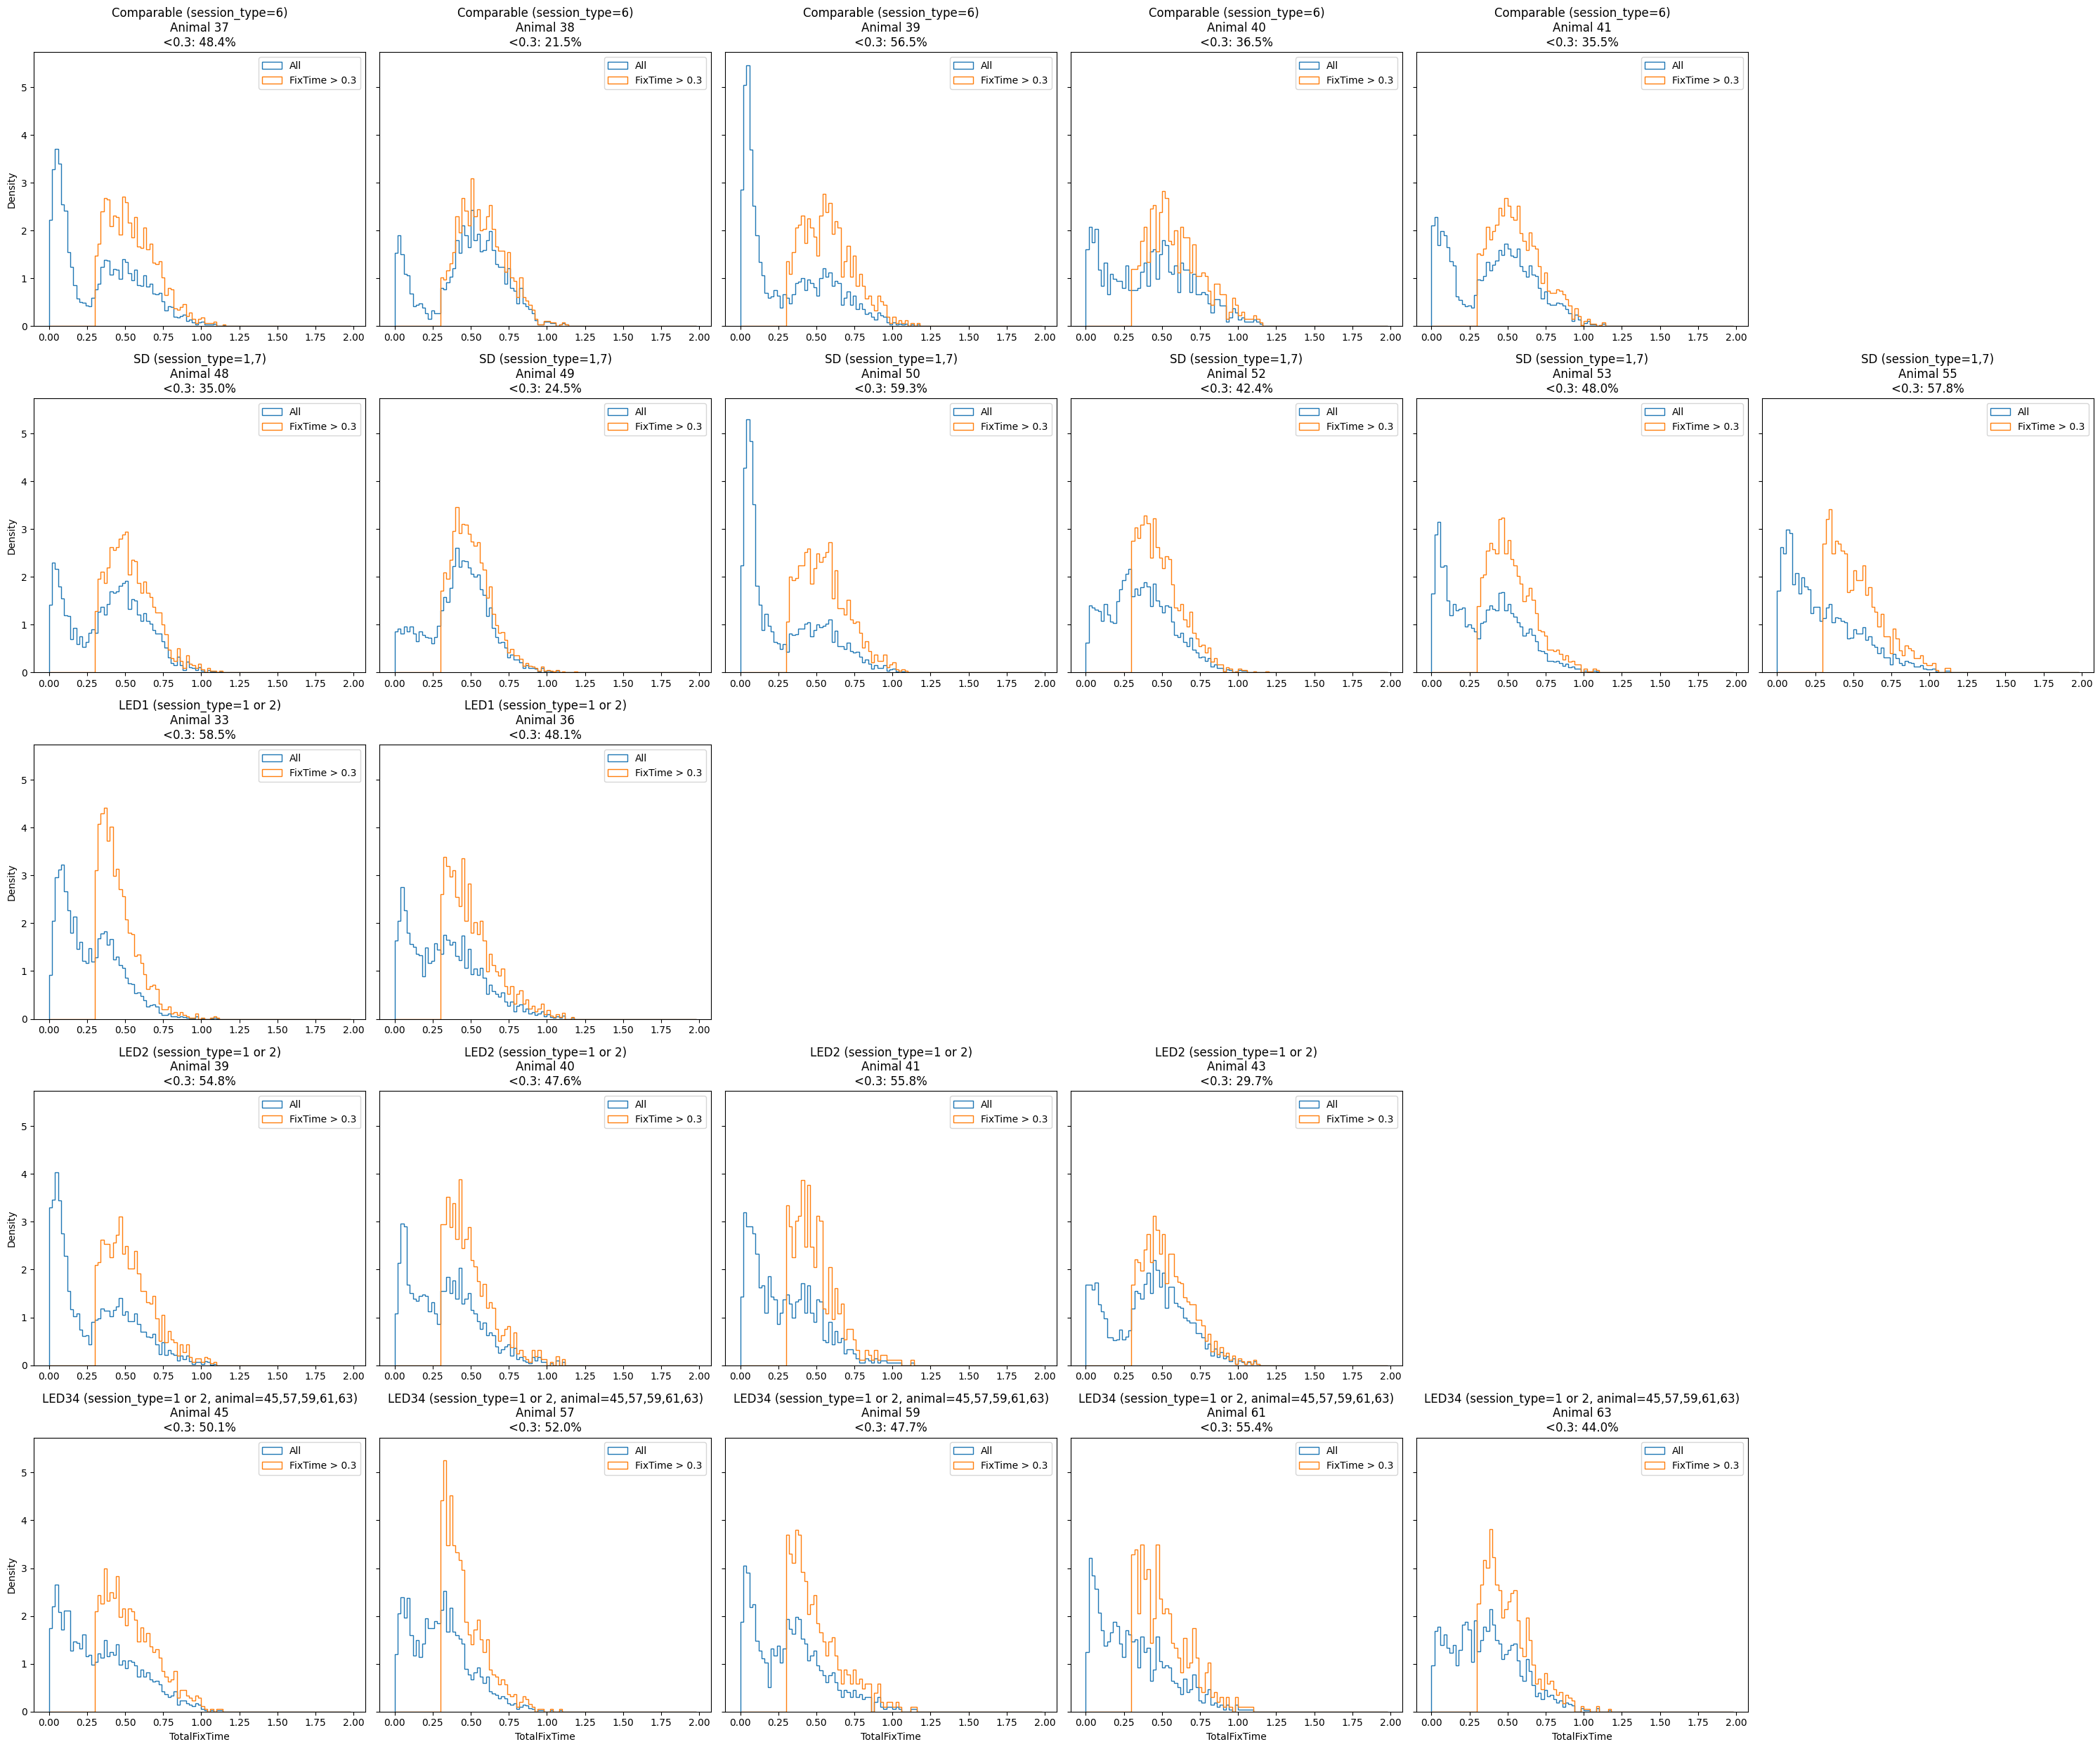

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Use your cases definition from above
# cases = [...]  # already defined

bins = np.arange(0, 2, 0.02)
n_rows = len(cases)
# For each case, get the list of animals (as strings, in their order of appearance)
case_animals_lists = [
    [str(animal) for animal in exp_df[case['query']]['animal'].dropna().unique()]
    for case in cases
]
n_cols_per_row = [len(animal_list) for animal_list in case_animals_lists]
max_cols = max(n_cols_per_row)

fig, axes = plt.subplots(n_rows, max_cols, figsize=(5*max_cols, 5*n_rows), sharey=True, squeeze=False)

for i, (case, animal_list) in enumerate(zip(cases, case_animals_lists)):
    case_df = exp_df[case['query']]
    for j in range(max_cols):
        ax = axes[i, j]
        if j < len(animal_list):
            animal = animal_list[j]
            animal_df = case_df[case_df['animal'].astype(str) == animal]
            df_aborts = animal_df[animal_df['abort_event'] == 3]
            n_total = len(df_aborts)
            n_below = (df_aborts['TotalFixTime'] < 0.3).sum()
            pct_below = (n_below / n_total * 100) if n_total > 0 else 0

            ax.hist(df_aborts['TotalFixTime'], density=True, bins=bins, histtype='step', label='All')
            ax.hist(df_aborts[df_aborts['TotalFixTime'] > 0.3]['TotalFixTime'], density=True, bins=bins, histtype='step', label='FixTime > 0.3')
            ax.set_title(f"{case['label']}\nAnimal {animal}\n<0.3: {pct_below:.1f}%")
            ax.legend()
        else:
            ax.axis('off')
        if i == n_rows - 1:
            ax.set_xlabel('TotalFixTime')
        if j == 0:
            ax.set_ylabel('Density')

plt.tight_layout()
plt.show()